In [ ]:
# !pip install adlfs
# !pip install ndpyramid
# !pip install pyresample
# !pip install xesmf

In [1]:

import adlfs
import xarray as xr
import pathlib
import zarr
import rioxarray as rxr
import geopandas as gpd
#import earthaccess
#import ndpyramid
#import datatree
#import odc.geo
#import odc.stac
import matplotlib.pyplot as plt
#import hvplot.xarray

In [2]:
#bbox_gdf = gpd.read_file('../snowmelt-timing-2024/data/grand_mesa.geojson')

In [3]:
sas_token = pathlib.Path('sas_token.txt').read_text()
#mask_store = adlfs.AzureBlobFileSystem(account_name="snowmelt", credential=sas_token).get_mapper("snowmelt/snow_mask_v2/global_modis_snow_mask.zarr")
mask_store = adlfs.AzureBlobFileSystem(account_name="snowmelt", credential=sas_token).get_mapper("snowmelt/snow_cover/global_modis_snow_cover_2.zarr")
#output_store = adlfs.AzureBlobFileSystem(account_name="snowmelt", credential=sas_token).get_mapper("snowmelt/snow_mask_v2/pyramid_global_modis_snow_mask.zarr")

#rocessed_tiles = zarr.open(mask_store).attrs['processed_tiles']

In [4]:
#v3 h11
# v=3
# h=10
# y_slice = slice(v * 2400, (v + 1) * 2400)
# x_slice = slice(h * 2400, (h + 1) * 2400)

In [5]:
#import rasterio
#crs = rasterio.CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [6]:
seasonal_snow_mask_ds = xr.open_zarr(mask_store,
                                     decode_coords='all',
                                     consolidated=True,
                                     mask_and_scale=False,
                                     )#.isel(x=x_slice,y=y_slice) #.rio.write_crs(crs)#.drop_vars('spatial_ref') #.isel(x=x_slice,y=y_slice) 
seasonal_snow_mask_ds

<xarray.Dataset> Size: 224GB
Dimensions:               (water_year: 10, y: 43200, x: 86400)
Coordinates:
    spatial_ref           int64 8B ...
  * water_year            (water_year) int64 80B 2015 2016 2017 ... 2023 2024
  * x                     (x) float64 691kB -2.001e+07 -2.001e+07 ... 2.001e+07
  * y                     (y) float64 346kB 1.001e+07 1.001e+07 ... -1.001e+07
Data variables:
    SAD_DOWY              (water_year, y, x) int16 75GB dask.array<chunksize=(1, 2400, 2400), meta=np.ndarray>
    SDD_DOWY              (water_year, y, x) int16 75GB dask.array<chunksize=(1, 2400, 2400), meta=np.ndarray>
    max_consec_snow_days  (water_year, y, x) int16 75GB dask.array<chunksize=(1, 2400, 2400), meta=np.ndarray>
Attributes:
    processed_tiles:  ['h15_v17', 'h16_v0', 'h17_v0', 'h17_v1', 'h15_v16', 'h...

In [7]:
# seasonal_snow_mask_ds=seasonal_snow_mask_ds.isel(y=slice(0,21600))
# seasonal_snow_mask_ds

In [8]:
#seasonal_snow_mask_ds['max_consec_snow_days'].rio.set_nodata(0,inplace=True)

In [9]:
# v=0
# h=8
# #h=12
# #v=13
# y_slice = slice(v * 2400, (v + 15) * 2400)
# x_slice = slice(h * 2400, (h + 6) * 2400)
v1 = 1
h1 = 7
v2 = 13
h2 = 12


# v1 = 0
# v2 = 3
# h1 = 6
# h2 = 9

v1 = 16
v2 = 18
h1 = 16
h2 = 18

# v1 = 0
# v2 = 4
# h1 = 14
# h2 = 15

y_slice = slice(v1 * 2400, v2 * 2400)
x_slice = slice(h1 * 2400, h2 * 2400)

#max_consec_snow_days_da = seasonal_snow_mask_ds['max_consec_snow_days'].isel(x=x_slice,y=y_slice).sel(water_year=water_year)
#max_consec_snow_days_da = seasonal_snow_mask_ds['max_consec_snow_days'].sel(water_year=water_year)

In [10]:
water_year = 2020


max_consec_snow_days_da = seasonal_snow_mask_ds['max_consec_snow_days'].isel(x=x_slice,y=y_slice).sel(water_year=water_year).compute()
sad_dowy_da = seasonal_snow_mask_ds['SAD_DOWY'].sel(water_year=water_year).isel(x=x_slice,y=y_slice).compute()
sdd_dowy_da = seasonal_snow_mask_ds['SDD_DOWY'].sel(water_year=water_year).isel(x=x_slice,y=y_slice).compute()

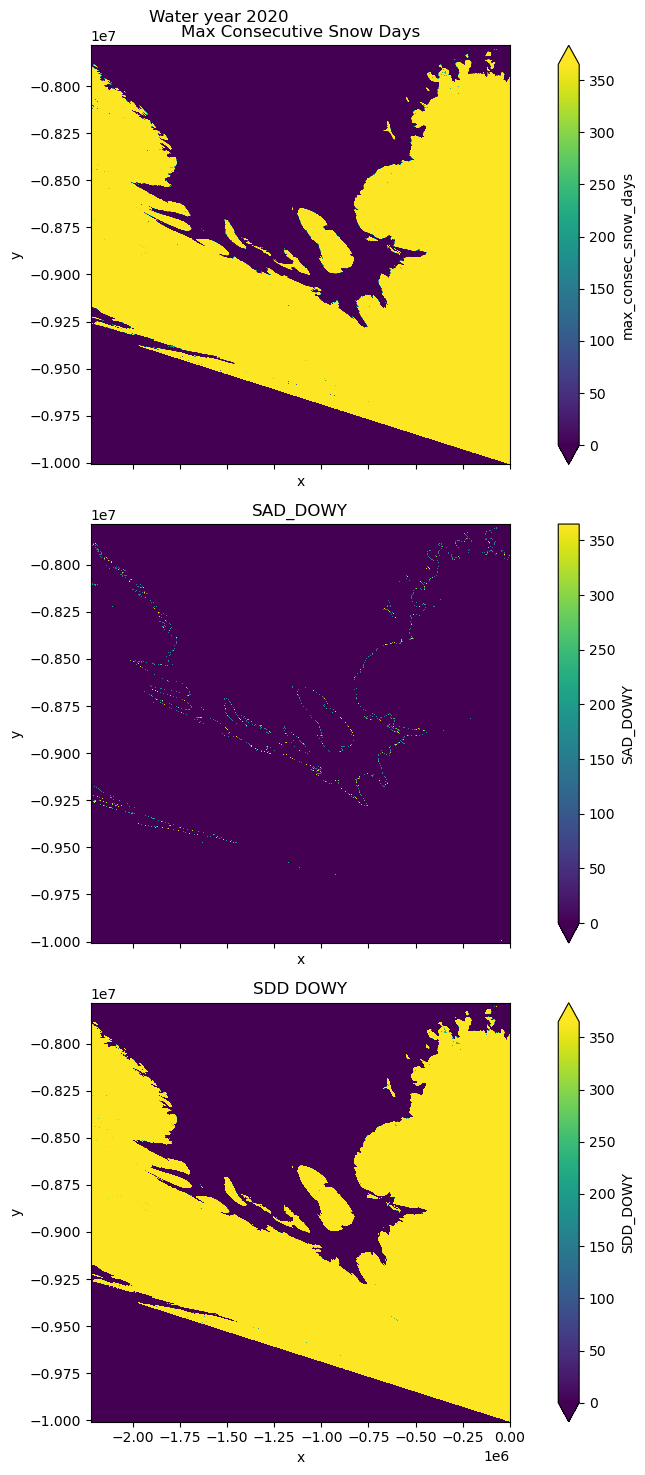

In [11]:
f,axs = plt.subplots(nrows=3,figsize=(10,15),sharex=True,sharey=True)

max_consec_snow_days_da.plot(ax=axs[0],cmap='viridis',vmin=0,vmax=365)
sad_dowy_da.plot(ax=axs[1],cmap='viridis',vmin=0,vmax=365)
sdd_dowy_da.plot(ax=axs[2],cmap='viridis',vmin=0,vmax=365)

axs[0].set_title('Max Consecutive Snow Days')
axs[1].set_title('SAD_DOWY')
axs[2].set_title('SDD DOWY')

for ax in axs:
    ax.set_aspect('equal')

f.suptitle(f'Water year {water_year}')


f.tight_layout()

Processing water year: 2015
Processing water year: 2016
Processing water year: 2017
Processing water year: 2018
Processing water year: 2019
Processing water year: 2020
Processing water year: 2021
Processing water year: 2022
Processing water year: 2023
Processing water year: 2024


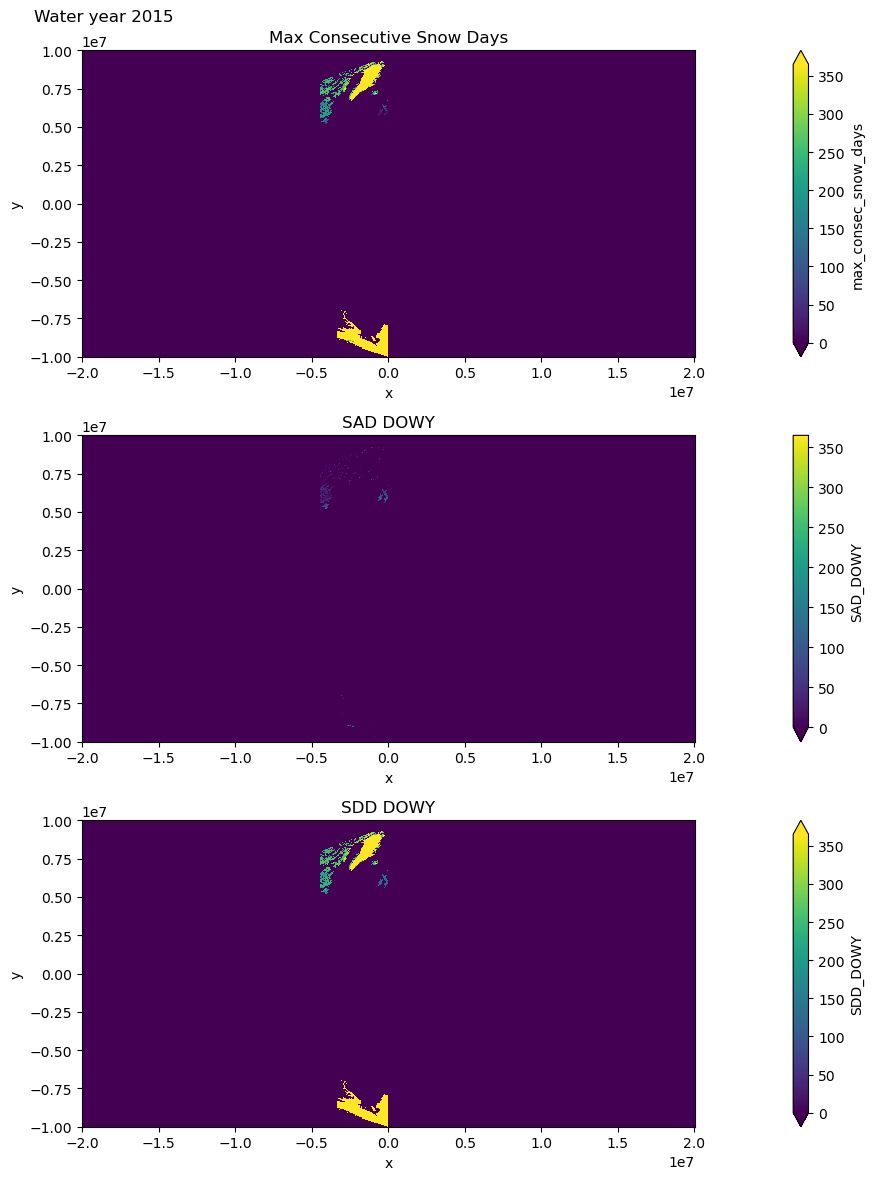

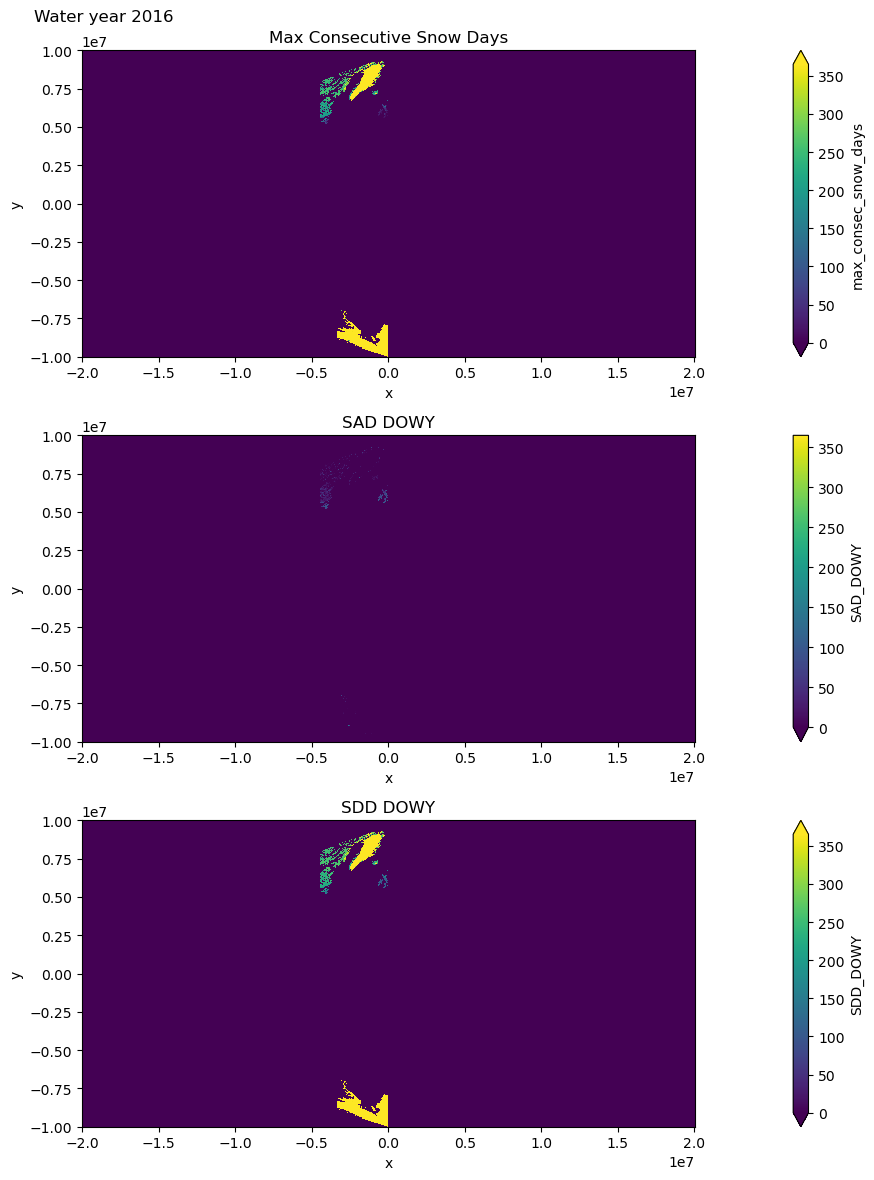

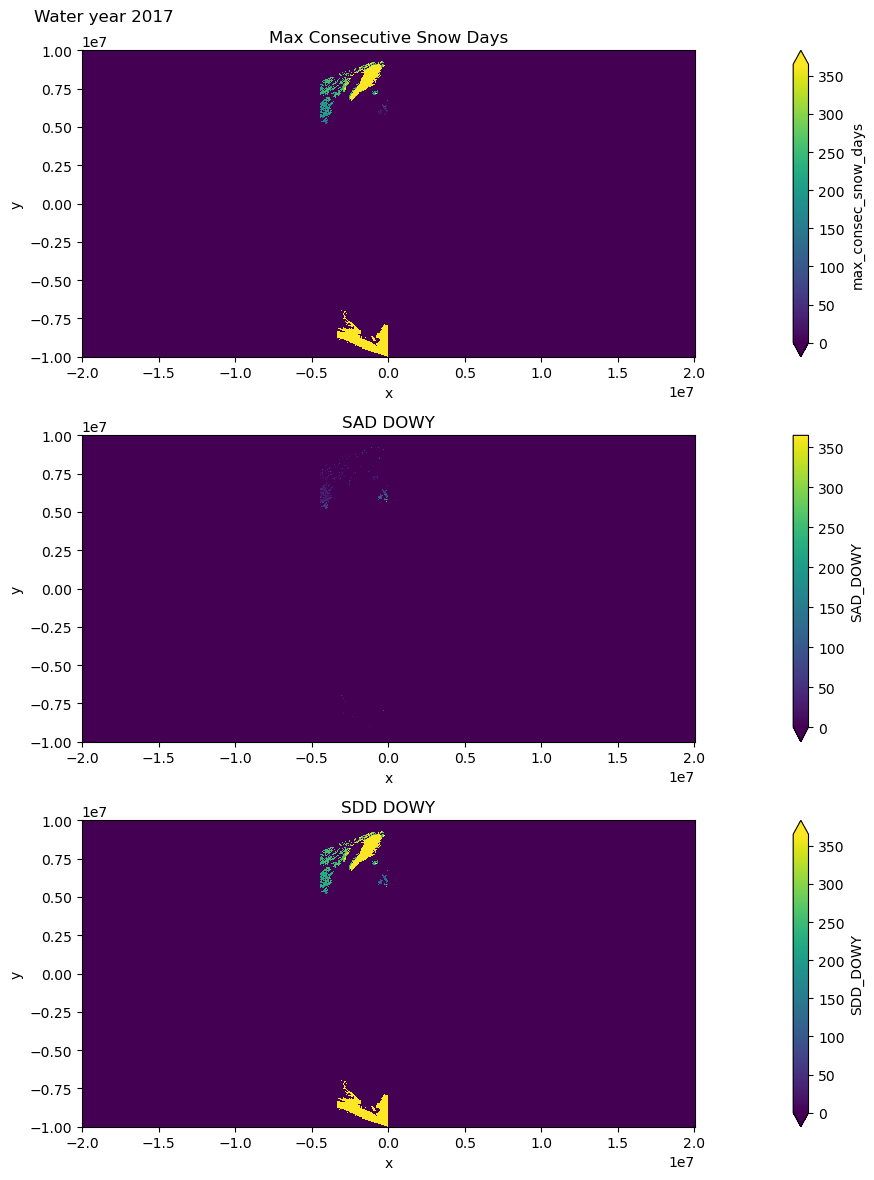

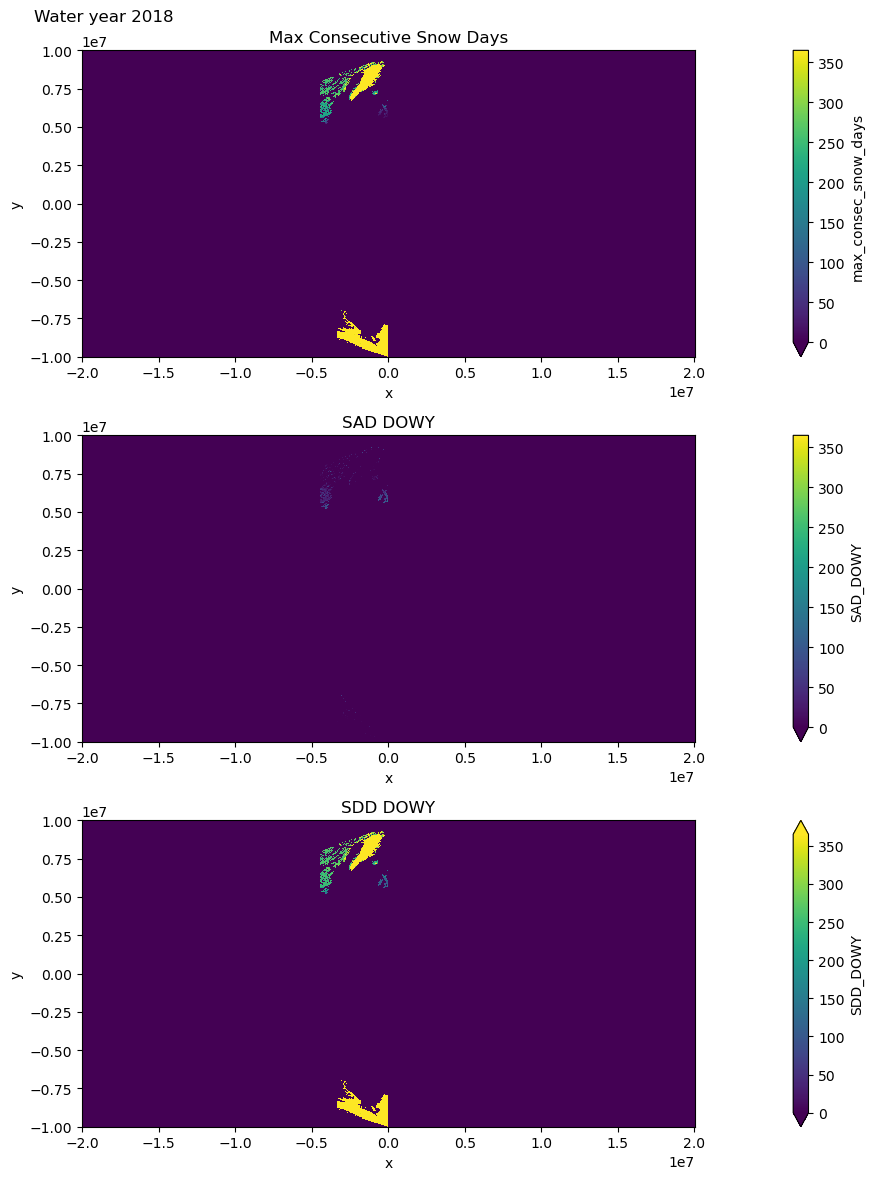

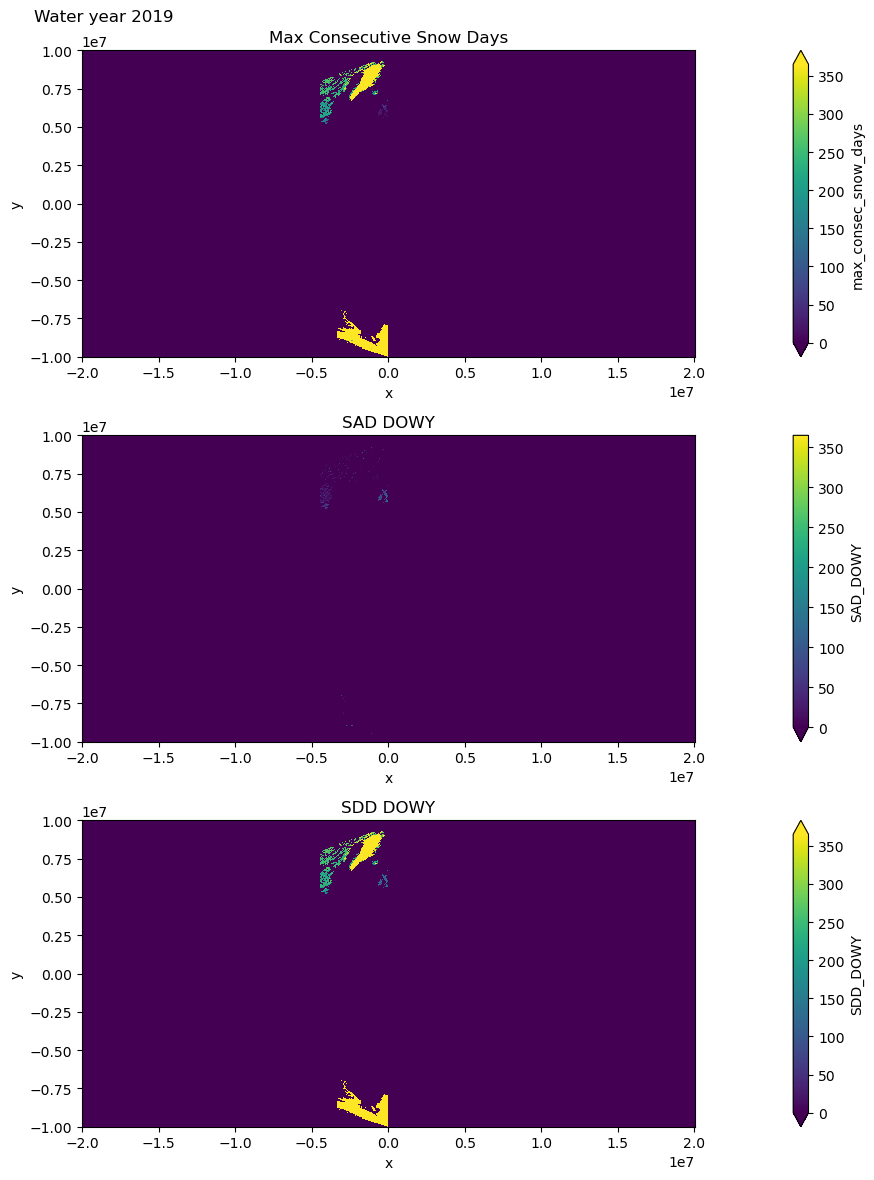

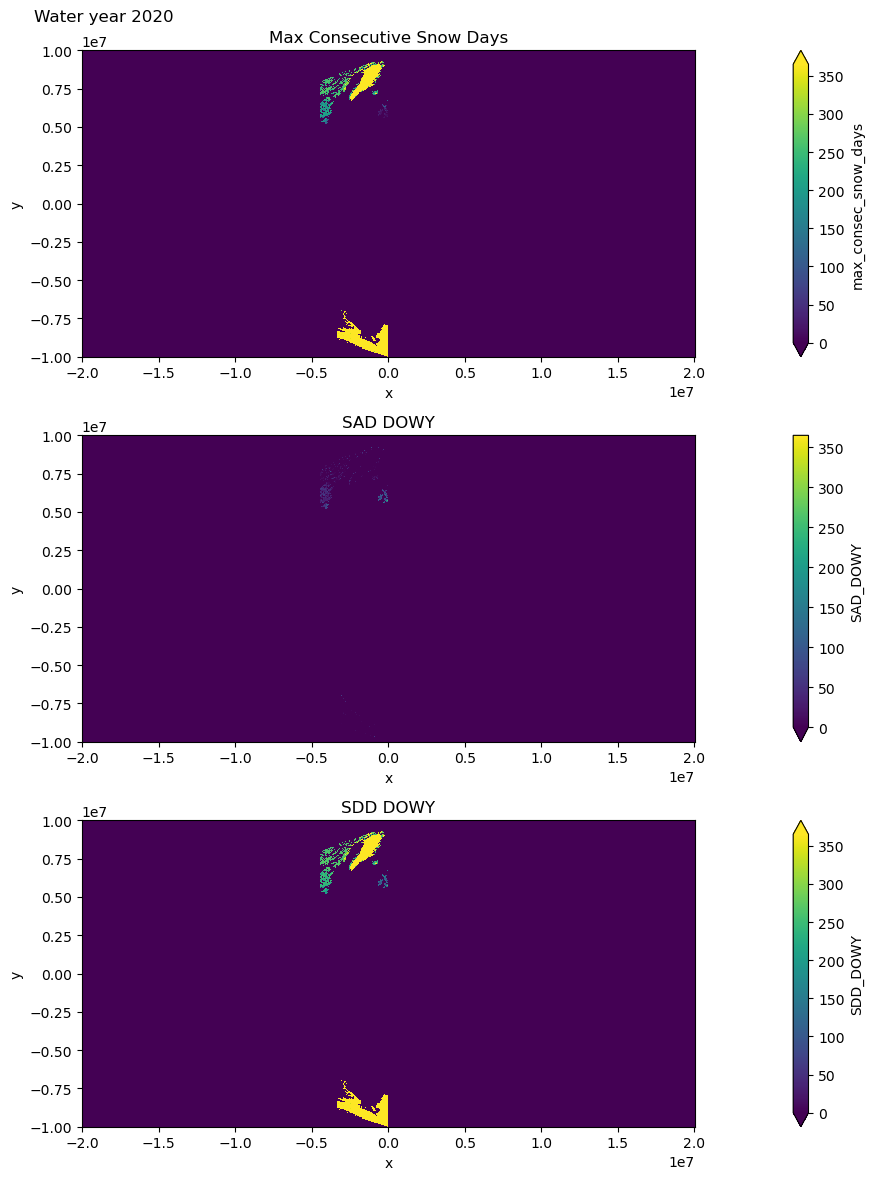

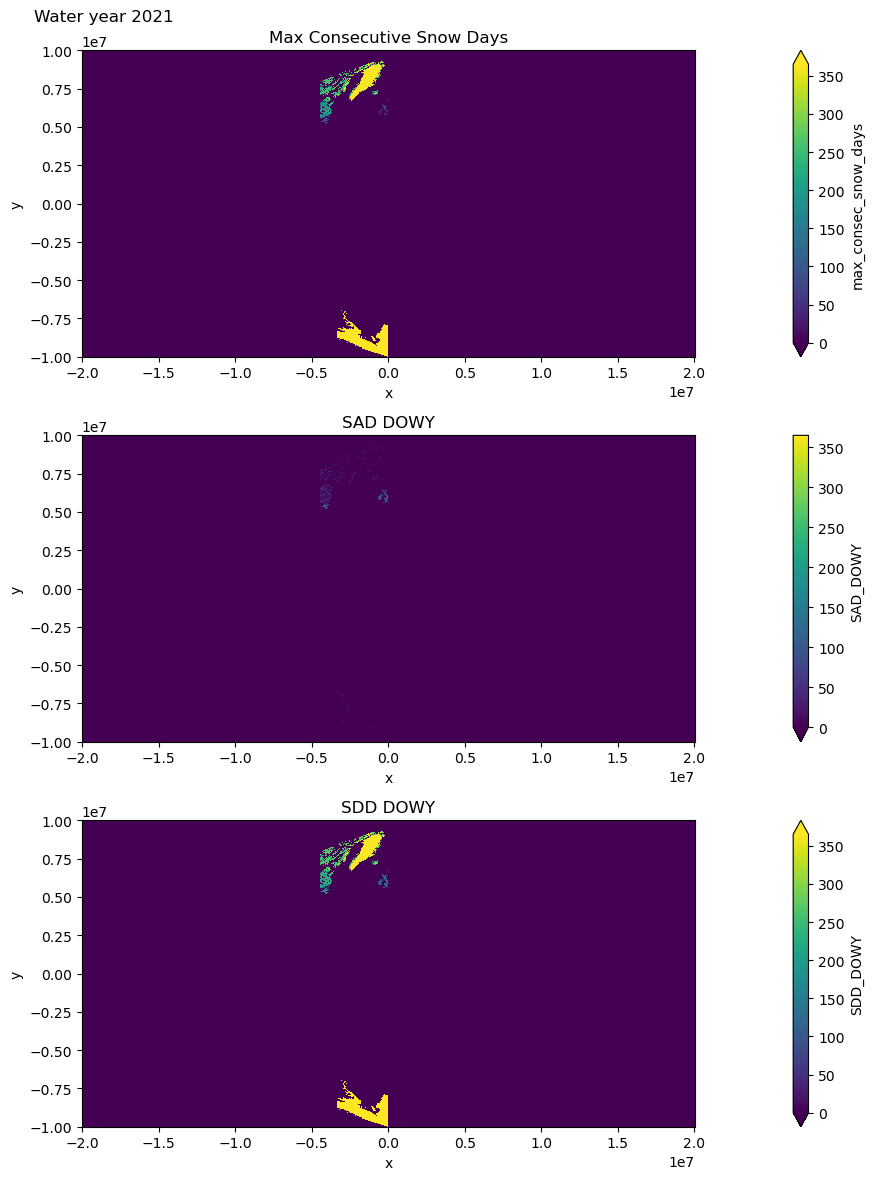

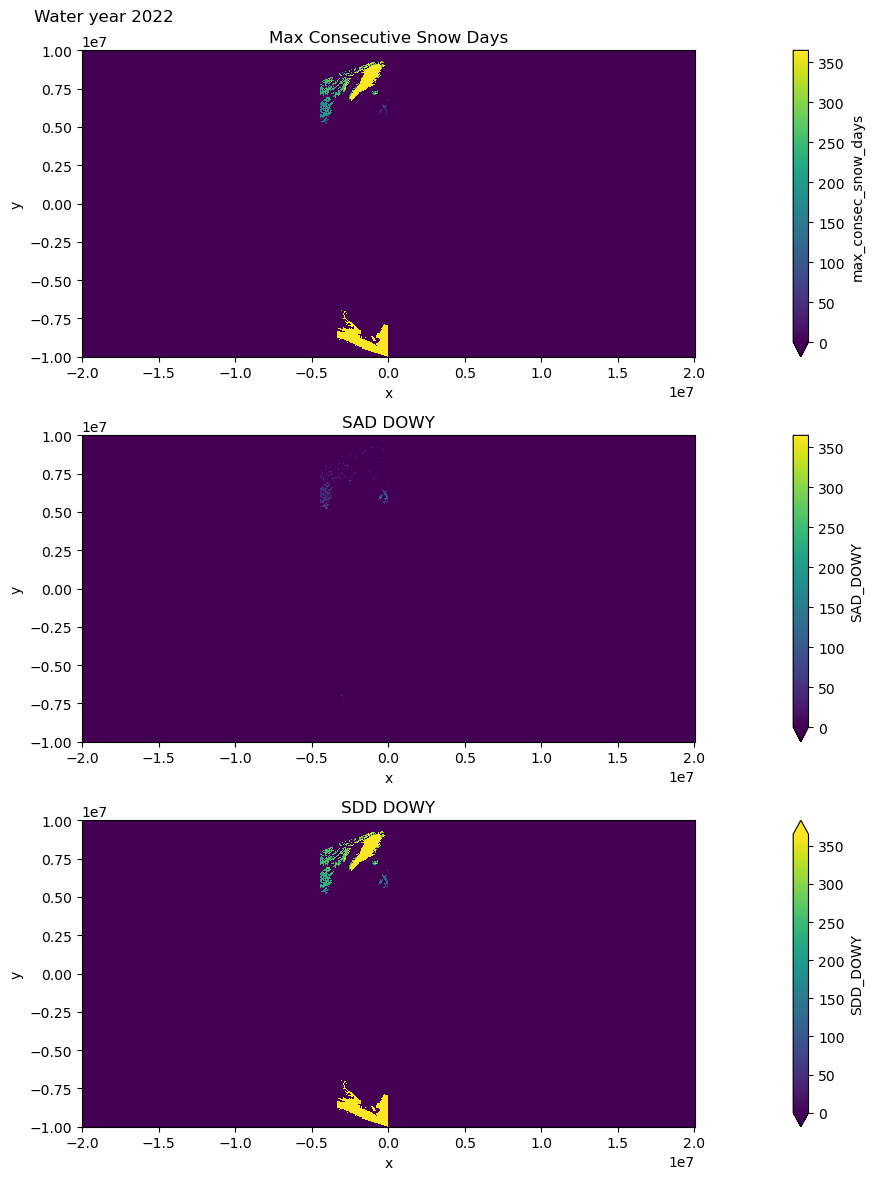

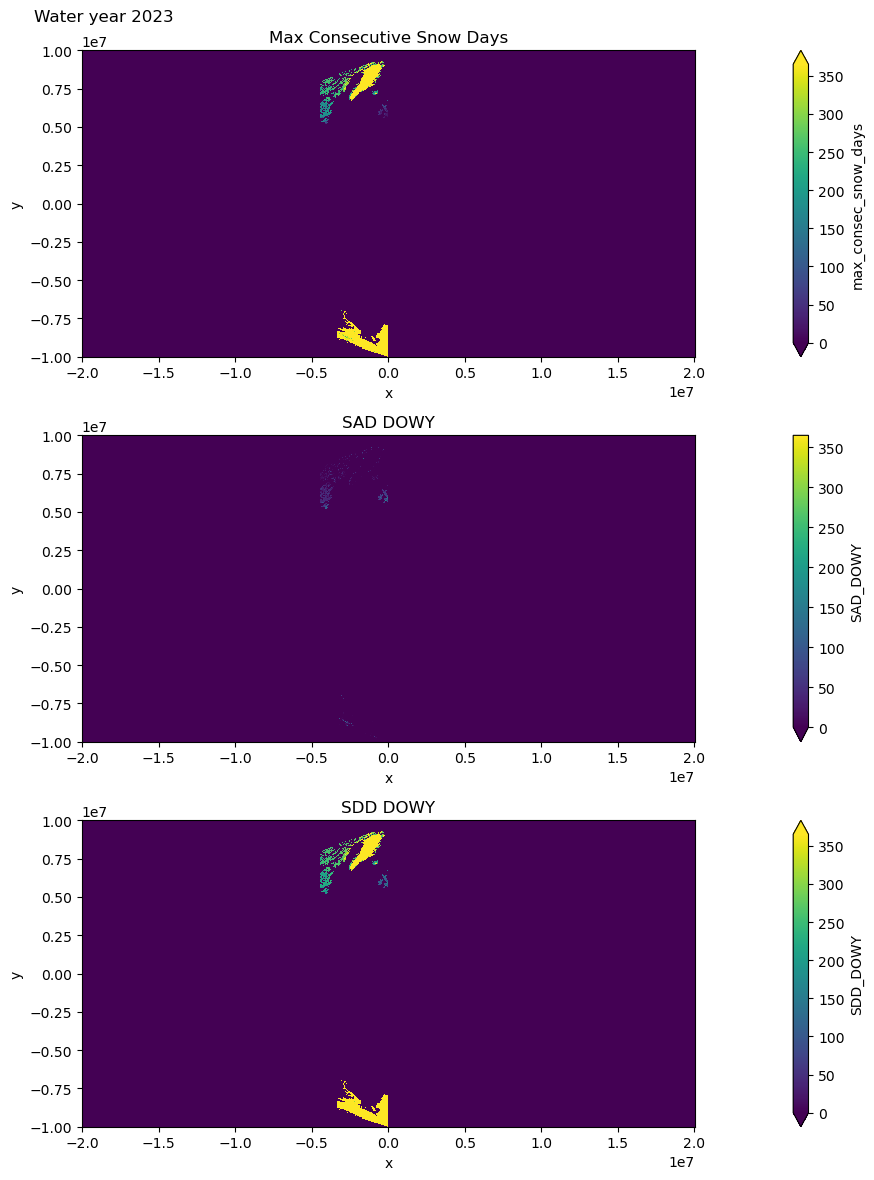

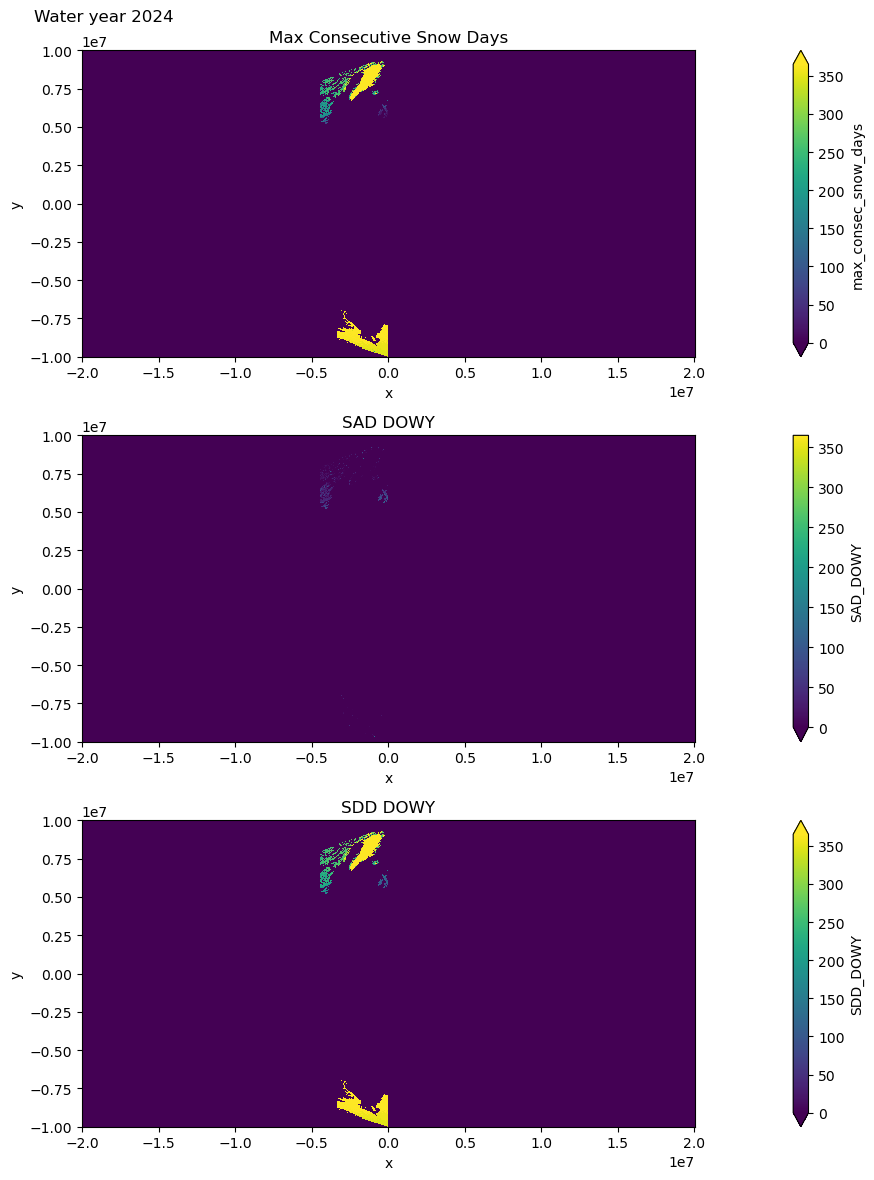

In [12]:
for water_year in seasonal_snow_mask_ds.water_year.values:

    print(f'Processing water year: {water_year}')

    max_consec_snow_days_da = seasonal_snow_mask_ds['max_consec_snow_days'].sel(water_year=water_year).coarsen(x=10,y=10,boundary='pad').mean().compute()
    sad_dowy_da = seasonal_snow_mask_ds['SAD_DOWY'].sel(water_year=water_year).coarsen(x=10,y=10,boundary='pad').mean().compute()
    sdd_dowy_da = seasonal_snow_mask_ds['SDD_DOWY'].sel(water_year=water_year).coarsen(x=10,y=10,boundary='pad').mean().compute()

    f,axs=plt.subplots(nrows=3,figsize=(20,12))

    max_consec_snow_days_da.plot.imshow(ax=axs[0],vmin=0,vmax=365,cmap='viridis')
    sad_dowy_da.plot.imshow(ax=axs[1],vmin=0,vmax=365,cmap='viridis')
    sdd_dowy_da.plot.imshow(ax=axs[2],vmin=0,vmax=365,cmap='viridis')

    axs[0].set_title('Max Consecutive Snow Days')
    axs[1].set_title('SAD DOWY')
    axs[2].set_title('SDD DOWY')


    for ax in axs:
        ax.set_aspect('equal')

    f.suptitle(f'Water year {water_year}')

    f.tight_layout()

In [ ]:
f,axs=plt.subplots(nrows=3,figsize=(20,12))

max_consec_snow_days_da.plot.imshow(ax=axs[0],vmin=0,vmax=365,cmap='viridis')
sad_dowy_da.plot.imshow(ax=axs[1],vmin=0,vmax=365,cmap='viridis')
sdd_dowy_da.plot.imshow(ax=axs[2],vmin=0,vmax=365,cmap='viridis')

axs[0].set_title('Max Consecutive Snow Days')
axs[1].set_title('SAD DOWY')
axs[2].set_title('SDD DOWY')


for ax in axs:
    ax.set_aspect('equal')

f.suptitle(f'Water year {water_year}')

f.tight_layout()

In [ ]:
f,ax=plt.subplots(figsize=(15,10))
max_consec_snow_days_da.plot.imshow(ax=ax,vmin=0,vmax=365)
ax.set_aspect('equal')
f.tight_layout()

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
max_consec_snow_days_da.sel(water_year=2023).plot.imshow(vmin=0,vmax=365)#.sel(water_year=2020).plot.imshow(ax=ax,vmin=0,vmax=365).odc.explore(vmin=0,vmax=365)

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
max_consec_snow_days_da.sel(water_year=2024).plot.imshow(vmin=0,vmax=365)#.sel(water_year=2020).plot.imshow(ax=ax,vmin=0,vmax=365).odc.explore(vmin=0,vmax=365)

In [ ]:
#seasonal_snow_mask_slice_ds = seasonal_snow_mask_ds['max_consec_snow_days'].isel(x=x_slice,y=y_slice).compute()

In [ ]:
#
#seasonal_snow_mask_slice_ds.hvplot(groupby='water_year',clim=(0,365)) # .sel(water_year=2020)

In [ ]:
%%time
# using pyresample https://ndpyramid.readthedocs.io/en/latest/generated/ndpyramid.pyramid_resample.html https://ndpyramid.readthedocs.io/en/latest/examples/pyramid-resample.html https://github.com/carbonplan/ndpyramid/blob/main/ndpyramid/resample.py

levels = 2
resampled_pyramid = ndpyramid.pyramid_resample(seasonal_snow_mask_ds.rename({'water_year':'time'}), levels=levels,pixels_per_tile=512,x='x',y='y',resampling='nearest')

In [ ]:
resampled_pyramid

In [ ]:
resampled_pyramid['1'].ds['max_consec_snow_days']

In [ ]:
resampled_pyramid['1'].ds['max_consec_snow_days'].sel(time=2023).odc.explore(vmin=0,vmax=365)

In [ ]:
%%time
# https://github.com/carbonplan/ndpyramid/blob/main/docs/examples/pyramid-resample.ipynb
resampled_pyramid.to_zarr(output_store, consolidated=True, mode='w')

In [ ]:
# https://github.com/carbonplan/maps/blob/main/demo/pages/index.js

In [ ]:
# using rasterio

# %%time
# levels = 4
# resampled_pyramid = ndpyramid.pyramid_reproject(seasonal_snow_mask_ds, levels=levels,resampling='nearest')
# resampled_pyramid

#resampled_pyramid['3'].ds['max_consec_snow_days'].sel(water_year=2020).odc.explore(vmin=0,vmax=365) #resampled_pyramid.to_zarr(output, consolidated=True, mode='w')


# #earthaccess.login()
# # # search = earthaccess.search_data(
# # #                 short_name="MOD10A1F",
# # #                 cloud_hosted=False,
# # #                 bounding_box=tuple(bbox_gdf.total_bounds),
# # #                 temporal=("2023-10-01","2024-09-30"),
# # #             )
# # #earthaccess.search_data?
# # files = earthaccess.open(search)
# # files

# #xr.open_mfdataset(files)
# !ls -lh /tmp/local_folder/

# temp_download_fp = "/tmp/local_folder"

# files = earthaccess.download(
#     search, temp_download_fp
# ) 

# modis_snow = xr.concat(
#     [
#         rxr.open_rasterio(
#             file, 
#             variable="CGF_NDSI_Snow_Cover", 
#             chunks={}
#         )["CGF_NDSI_Snow_Cover"] for file in files])
